![GRAPHE](LOGO.png)

<h1><span style="color:#FF5733">  RAPPORT_DS_Analyse et Conception des Algorithmes</span></h1>


<table>
    <tr>
<th>Université</th>
        <td>Université Ibn Zohr</td>
    </tr>
    <tr>
        <th>Année universitaire</th>
        <td>2023/2024</td>
    </tr>
    <tr>
        <th>École</th>
        <td>ENSIASD - Taroudant</td>
    </tr>
    <tr>
        <th>Année du cycle Ingénieur</th>
        <td>1ère Année</td>
    </tr>
    <tr>
        <th>Professeur</th>
        <td>Pr. Mohammed Kasri</td>
    </tr>
    <tr>
        <th>Filière</th>
        <td>SITCN</td>
    </tr>
</table>

</body>
</html>


<h4>LES ÉTUDIANTES :</h4>

<table>
    <tr>
        <th>Nom</th>
        <th>Prénom</th>
    </tr>
    <tr>
        <td>BOUTALMAOUINE</td>
        <td>Mohamed</td>
    </tr>
    <tr>
        <td>AHOUARI</td>
        <td>Belaid</td>
    </tr>
</table>

# Importation de la bibliothèque :

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import FancyArrowPatch
from collections import deque

# Partie I :

### 1)  Nous définissons les positions des nœuds et les arêtes du graphe non orienté.

In [5]:
# Définir les positions des nœuds
positions = { 
    'A': (0, 1),
    'B': (1, 2),
    'C': (1, 0),
    'D': (2, 1),
    'E': (3, 0),
    'F': (3, 2),
    'G': (4, 1),
    'I': (5, 1)
}


# Définir les connexions (arêtes) entre les nœuds
arêtes = [
    ('A', 'B'),
    ('A', 'C'),
    ('B', 'C'),
    ('B', 'D'),
    ('C', 'D'),
    ('D', 'E'),
    ('D', 'F'),
    ('D', 'G'),
    ('E', 'G'),
    ('F', 'G'),
    ('I', 'G'),
]

### 2) Fonction pour l'affichage du graphe non orienté : Cette fonction prend les positions des nœuds et les arêtes comme arguments et utilise matplotlib pour afficher le graphe.

In [6]:
# Fonction pour l'affichage du graphe non orienté
def Affichage_Non_Orienté(positions, arêtes):
    fig, ax = plt.subplots()

    for node, (x, y) in positions.items():
        ax.plot(x, y, 'o', markersize=30, color='lightgrey')
        ax.text(x, y, node, ha='center', va='center', zorder=3, fontsize=12)

    for i in arêtes:
        x_coords = [positions[i[0]][0], positions[i[1]][0]]
        y_coords = [positions[i[0]][1], positions[i[1]][1]]
        ax.plot(x_coords, y_coords, 'k-', zorder=1)

    ax.set_xlim(-0.5, 5.5)
    ax.set_ylim(-0.5, 3.5)

    ax.axis('off')

    plt.figtext(0.5, -0.05, "Affichage arbre non-orienté.", ha="center", fontsize=10)

    plt.show()

### 3) Appel de la fonction d'affichage : Nous appelons la fonction d'affichage en lui passant les positions et les arêtes pour afficher le graphe non orienté.

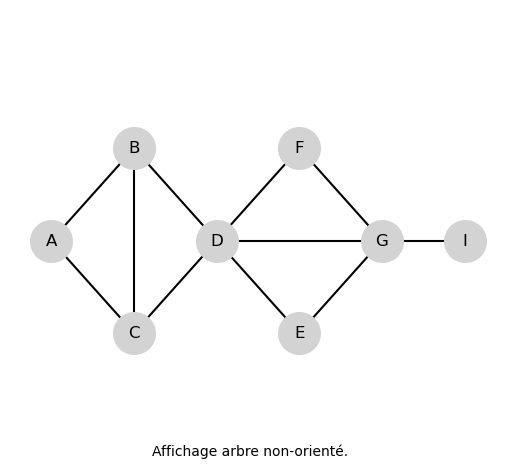

In [7]:
Affichage_Non_Orienté(positions, arêtes)

# Partie II :

### 1) Définition de la fonction adjust_positions : Créer une fonction pour ajuster les positions des flèches afin qu'elles ne pénètrent pas dans les nœuds.

In [16]:
def adjust_positions(start, end, shift=0.15):
    """Ajuster les positions pour que les flèches ne pénètrent pas dans les nœuds"""
    start = np.array(start)
    end = np.array(end)
    direction = end - start
    length = np.linalg.norm(direction)
    unit_direction = direction / length
    return start + shift * unit_direction, end - shift * unit_direction

### 2) Définition de la fonction Affichage_Orienté : Créer une fonction pour afficher le graphe orienté en utilisant matplotlib

In [17]:
def Affichage_Orienté(positions, edges):
    fig, ax = plt.subplots()

    
    for node, (x, y) in positions.items():
        ax.plot(x, y, 'o', markersize=30, color='lightgrey')
        ax.text(x, y, node, ha='center', va='center', zorder=3, fontsize=12)

    for edge in edges:
        start, end = edge
        start_pos = positions[start]
        end_pos = positions[end]
        adjusted_start, adjusted_end = adjust_positions(start_pos, end_pos)
        arrow = FancyArrowPatch(adjusted_start, adjusted_end,
                                arrowstyle='->', color='k', mutation_scale=15,
                                lw=1, zorder=2)
        ax.add_patch(arrow)

    ax.set_xlim(-0.5, 5.5)
    ax.set_ylim(-0.5, 2.5)

    ax.axis('off')

    plt.figtext(0.5, -0.05, "Affichage graphe orienté.", ha="center", fontsize=10)

    plt.show()


### 3) Appel de la fonction d'affichage : Appeler la fonction Affichage_Orienté pour afficher le graphe.

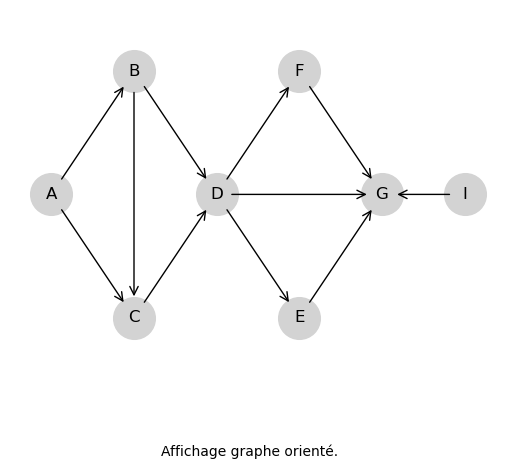

In [18]:
Affichage_Orienté(positions, arêtes)

# Partie III :

### 1) Initialisation des couleurs et définition du graphe : Définir les couleurs initiales des nœuds et le graphe.

In [50]:
# Définition du graphe avec des connexions bidirectionnelles
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'F'],
    'C': ['A', 'E', 'D'],
    'D': ['B', 'E', 'F'],
    'E': ['C', 'D', 'G'],
    'F': ['B', 'D', 'G'],
    'G': ['E', 'F'],
    'H': ['G']
}

# Positions des nœuds pour l'affichage
positions = {
    'A': (0, 2),
    'B': (1, 3),
    'C': (1, 1),
    'D': (2, 2),
    'E': (3, 1),
    'F': (3, 3),
    'G': (4, 2),
    'H': (5, 1),
}

# Initialisation des couleurs
colors = {node: 'lightgrey' for node in graph}
colors['A'] = 'red'

### 2) Définition des fonctions utilitaires :

##### - adjust_edge_position : Ajuster les positions des arêtes.

In [51]:
def adjust_edge_position(start, end, node_size):
    """ Ajuster les positions des arêtes pour qu'elles ne pénètrent pas dans les nœuds. """
    direction = np.array(end) - np.array(start)
    length = np.linalg.norm(direction)
    direction = direction / length

    start_adjusted = np.array(start) + direction * node_size
    end_adjusted = np.array(end) - direction * node_size

    return start_adjusted, end_adjusted

##### - draw_graph : Dessiner le graphe.

In [52]:
def draw_graph(ax, positions, colors, graph, node_size=0.15):
    ax.clear()
    ax.set_xlim(-1, 6)
    ax.set_ylim(0, 4)
    ax.set_aspect('equal')
    ax.axis('off')  # Désactiver les axes

    # Dessiner les arêtes
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            start_pos = positions[node]
            end_pos = positions[neighbor]
            start_adjusted, end_adjusted = adjust_edge_position(start_pos, end_pos, node_size)
            ax.plot([start_adjusted[0], end_adjusted[0]], [start_adjusted[1], end_adjusted[1]], 'black', linewidth=2)

    # Dessiner les nœuds
    for node, pos in positions.items():
        ax.plot(pos[0], pos[1], 'o', markeredgecolor='black', markeredgewidth=2, color=colors[node], markersize=30)
        ax.text(pos[0], pos[1], node, color='black', ha='center', va='center', fontsize=12, fontweight='bold')

##### - bfs : Exécuter la recherche en largeur (BFS).

In [53]:
def bfs(graph, start):
    visited = {node: False for node in graph}
    queue = deque([(start, 0)])  # Ajouter la profondeur dans la file
    visited[start] = True
    order = []

    while queue:
        node, depth = queue.popleft()
        order.append((node, depth))
        for neighbor in graph[node]:
            if not visited[neighbor]:
                queue.append((neighbor, depth + 1))
                visited[neighbor] = True
    return order

### 3)  Exécution de BFS pour obtenir l'ordre de visite avec les profondeurs.

In [54]:
# Exécuter BFS pour obtenir l'ordre de visite avec les profondeurs
bfs_order = bfs(graph, 'A')

# Vérifier les nœuds non visités et les ajouter
all_nodes = set(graph.keys())
visited_nodes = set(node for node, _ in bfs_order)
remaining_nodes = all_nodes - visited_nodes

for node in remaining_nodes:
    bfs_order.append((node, max(depth for _, depth in bfs_order) + 1))

### 4) Initialisation des couleurs pour l'animation : Préparer les couleurs pour chaque frame de l'animation.

In [55]:
# Initialiser les couleurs pour l'animation
frames = []
frame_colors = colors.copy()
color_palette = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'pink']  # Palette de couleurs vives
for i, (node, depth) in enumerate(bfs_order):
    frame_colors[node] = color_palette[depth % len(color_palette)]  # Utiliser la palette de couleurs
    frames.append(frame_colors.copy())

### 5) Affichage de l'animation : Afficher le graphe frame par frame pour montrer l'animation.

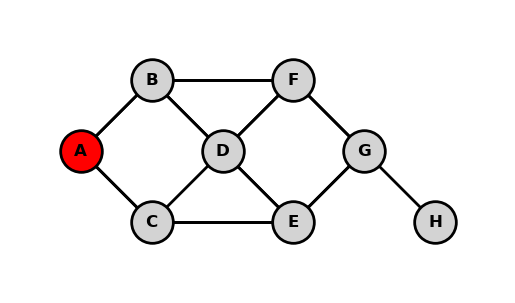

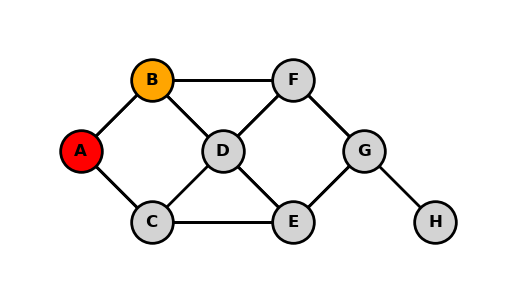

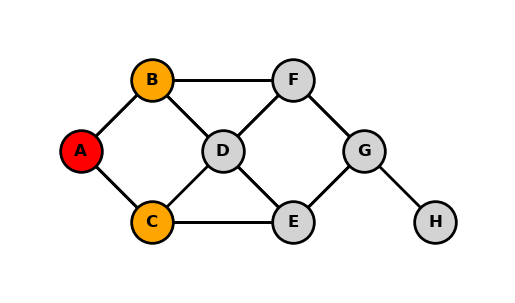

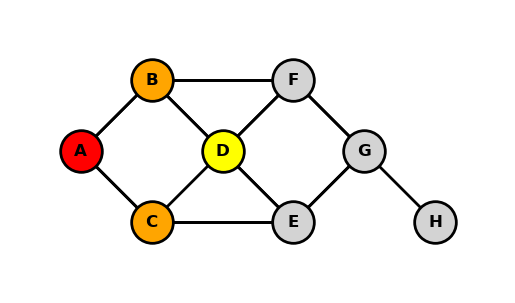

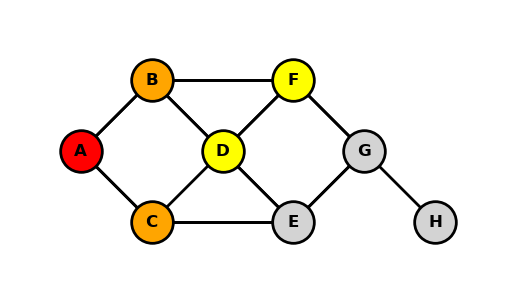

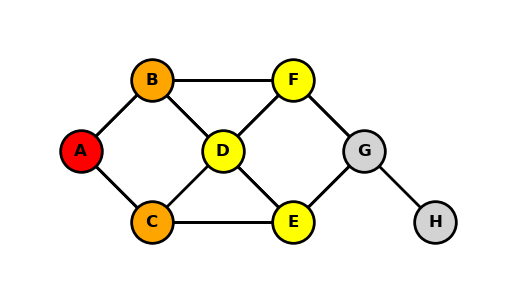

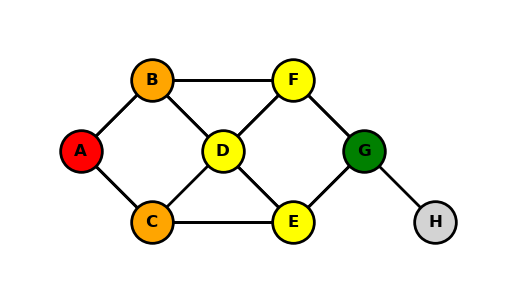

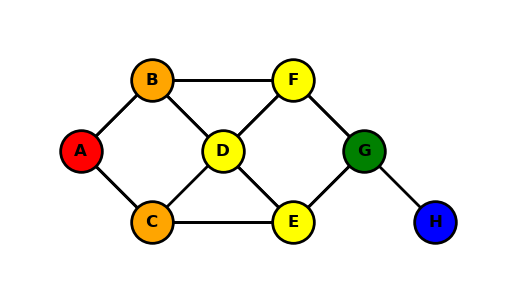

In [56]:
# Affichage de l'animation frame par frame
for frame in frames:
    fig, ax = plt.subplots()
    draw_graph(ax, positions, frame, graph)
    plt.show()